In [1]:
import mlflow
import time

In [2]:
# # Create a new MLflow Experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080/")
time.sleep(15)
experiment_id = "cat_and_dog_exp"
print("experiment_id : ",experiment_id)
mlflow.set_experiment(experiment_id)

2025/10/11 10:35:45 INFO mlflow.tracking.fluent: Experiment with name 'cat_and_dog_exp' does not exist. Creating a new experiment.


experiment_id :  cat_and_dog_exp


<Experiment: artifact_location='mlflow-artifacts:/338877028298542044', creation_time=1760153745542, experiment_id='338877028298542044', last_update_time=1760153745542, lifecycle_stage='active', name='cat_and_dog_exp', tags={}>

In [3]:
import tensorflow as tf
img_size = 128
batch_size = 16

root_path = r"/Users/tharhtet/Documents/github/ML-in-Prod-batch-1/5_DeepLearning/tf_best_practices/cats_and_dogs_filtered"

In [4]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1/255.0

)

train_gen = tf_generator.flow_from_directory(

    root_path+"/train",
    target_size=(img_size, img_size),
    class_mode= 'binary', #'categorical',
    batch_size=batch_size,
    shuffle=True,
    
)

test_gen = tf_generator.flow_from_directory(
    root_path+"/test",
    target_size=(img_size, img_size),
    class_mode='binary', #'categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


16
1.0
(128, 128, 3)


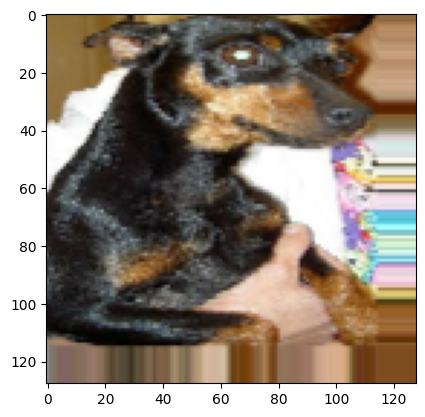

In [5]:
### test Generator
import matplotlib.pyplot as plt
import numpy as np
test_img = None
test_label = None
for image,label in test_gen:
    print(len(image))
    test_img = image
    test_label = label
    break
print(test_label[0])
print(test_img[0].shape)
plt.imshow(test_img[0])
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

input_shape = (img_size,img_size,3)
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same',input_shape = input_shape),
    Conv2D(32,kernel_size=(3,3),activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides=2),
   

    Conv2D(64,kernel_size=(3,3),activation = 'relu'), 
    Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides=2),

    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')    
    
])

model.summary()

/opt/anaconda3/envs/ths_dev/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-11 10:35:54.176778: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-10-11 10:35:54.176837: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-10-11 10:35:54.176842: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1760153754.177275 30557515 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1760153754.177512 30557515 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,887,137 (106.38 MB)

 Trainable params: 27,887,137 (106.38 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import datetime

batch_size =  batch_size
epochs  = 3


base_learning_rate = 1e-3 #0.0001

from tensorflow.keras.optimizers import RMSprop


optimizer = tf.keras.optimizers.Adam()
#optimizer = RMSprop(learning_rate=0.0001)

#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
#model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [8]:
num_train = len(train_gen.filenames)
num_test = len(test_gen.filenames)
steps_per_epoch=int(num_train / batch_size)
print("Number of train : ",num_train)
print(num_test/batch_size)
print(steps_per_epoch)

Number of train :  2752
15.5
172


In [9]:
test_img.shape

(16, 128, 128, 3)

In [10]:
# preapre model sig

from mlflow.models.signature import infer_signature

model_sig = infer_signature(test_img,model.predict(test_img))
print("model_sig : ",model_sig)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
model_sig :  inputs: 
  [Tensor('float32', (-1, 128, 128, 3))]
outputs: 
  [Tensor('float32', (-1, 1))]
params: 
  None



2025-10-11 10:36:14.513171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [11]:
train_params = {
    "num_epochs" : epochs,
    "input_shape" : input_shape,
    "batch_size" : batch_size,
    "steps_per_epoch" : steps_per_epoch
}

In [12]:
mlflow.tensorflow.autolog()
mlflow.enable_system_metrics_logging()

2025/10/11 10:36:50 WARNING mlflow.utils.autologging_utils: MLflow tensorflow autologging is known to be compatible with 2.7.4 <= tensorflow <= 2.18.0, but the installed version is 2.19.0. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a compatible version, or try upgrading MLflow.


In [13]:
with mlflow.start_run(log_system_metrics = True,run_name="ths_run1") as run:
    time.sleep(15)
    mlflow.set_tag("dev","tharhtet")
    mlflow.log_params(train_params)

    history = model.fit(train_gen,epochs= epochs,
                        validation_data = test_gen,
                        verbose=1)
    
    train_acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    for t_acc, t_loss, v_acc, v_loss in zip(train_acc,train_loss,val_acc,val_loss):
        mlflow.log_metric("training_acc",t_acc)
        mlflow.log_metric("training_loss",t_loss)
        mlflow.log_metric("val_acc",v_acc)
        mlflow.log_metric("val_loss",v_loss)
    
    mlflow.keras.log_model(model,"tf_bcc_model",signature=model_sig)
    
    

2025/10/11 10:37:30 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/10/11 10:37:30 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/10/11 10:41:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths_dev/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored."


Epoch 1/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.5030 - loss: 0.8657 - val_accuracy: 0.4597 - val_loss: 0.6943
Epoch 2/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.4966 - loss: 0.6935 - val_accuracy: 0.4597 - val_loss: 0.6950
Epoch 3/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.5037 - loss: 0.6934 - val_accuracy: 0.4597 - val_loss: 0.6941


2025/10/11 10:42:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: API request to http://127.0.0.1:8080/api/2.0/mlflow/runs/log-batch failed with exception HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api/2.0/mlflow/runs/log-batch (Caused by ResponseError('too many 500 error responses'))
2025/10/11 10:42:31 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/10/11 10:42:31 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


🏃 View run ths_run1 at: http://127.0.0.1:8080/#/experiments/338877028298542044/runs/294e10846b2048649d62573cc96d7c20
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/338877028298542044


In [16]:

model_name = "cat_and_dog_model"
register_model_uri = f"models:/{model_name}@dev"
print(register_model_uri)
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(register_model_uri)



models:/cat_and_dog_model@dev


In [17]:
loaded_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846],
       [0.5055846]], dtype=float32)